# Conference nametags
In this notebook I will analyze the space on 31 conference nametags. My goal is to develop a general sense of how nametags are designed. I don't want to critizise or highlight individual organizers. Thus, I'm using a colleages collection of 31 nametags from more than a decade of conferences. (Also, I don't keep all my nametags, so I don't have many to look at right now). This notebook will show you that the design of most nametag is not optimal for readability.

I put all those tags on a scanner and scanned them at 100 dpi (dots per inch) resolution in balck and white, so one pixel in the images is $\left(\frac{1}{100}\right)^2$ square inches. I did not take the tags out of their plastic holders, so some of them are a little crocked in the scan. Then, I open all scans in photoshop and mark the approximate area that is used for the name in blue, the one of the affiliation in yellow and draw a thin red line around the outside of the nametag to get the total size. There is some ambiguity here, because a name needs more space if the person called "David Huenemoerder" than "P. Hsi". Similarly for the affilitaion I could write "MKI" (three characters) or "MIT Kavli Institute for Astrophysics and Space Research" (many more characters). With that in mind, I tried to consistently mark up the entire "line" as much as possible.

In [1]:
from glob import glob
import numpy as np
from matplotlib import pyplot as plt
import PIL

In [2]:
%matplotlib inline
plt.style.use("fivethirtyeight")

In [3]:
flist = glob('/Users/hamogu/data/nametags/*')

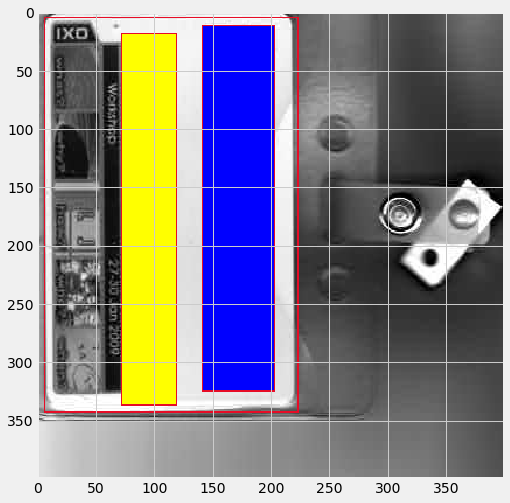

In [4]:
img = np.array(PIL.Image.open(flist[5]))
fig, ax =plt.subplots(figsize=(8,8))
plt.imshow(img[:400, :400], aspect='equal')

One example of a scanned badge. The area with the name in marked in blue, the area with the affiliation in yellow and I put a (faint) red border around the entire badge.

In [5]:
tab = np.zeros(len(flist), dtype=np.dtype([('name', np.float), ('affil', np.float), ('size', np.float)]))

In [6]:
# Read all images
# Get number of blue pixels, yellow pixels, and the number of pixels inside of the red rectangle.
for i, f in enumerate(flist):
    img = PIL.Image.open(f)
    imgarr = np.array(img)
    tab['name'][i] = np.all(imgarr == [  0,   0, 255, 255], axis=2).sum()
    tab['affil'][i] = np.all(imgarr == [  255,   255, 0, 255], axis=2).sum()
    pixborder = np.all(imgarr == [231, 12, 38, 255], axis=2)
    x, y = pixborder.nonzero()
    dx = x.max() - x.min()
    dy = y.max() - y.min()
    tab['size'][i] = dx * dy

In [7]:
pix_sqin = 0.01**2
pix_sqcm = (0.01 * 2.54)**2

In [8]:
# Sort by size
ind = np.argsort(tab['size'])
tab = tab[ind]

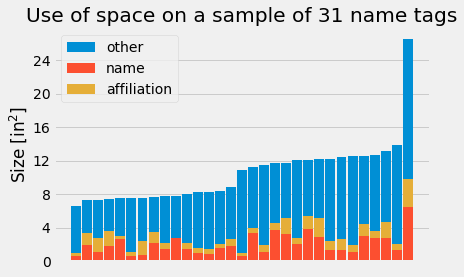

In [9]:
x = np.arange(len(tab))
width=.9
p1 = plt.bar(x, tab['size'] * pix_sqin, width, label='other')
p2 = plt.bar(x, tab['name'] * pix_sqin, width, label='name')
p3 = plt.bar(x, tab['affil'] * pix_sqin, width, 
             bottom=tab['name'] * pix_sqin, label='affiliation')

plt.ylabel('Size [in$^2$]')
plt.title('Use of space on a sample of 31 name tags')
plt.xticks([])
plt.yticks(np.arange(0, 26, 4))
plt.legend()


This plot shows how the space on the badge is used for every one of the 31 badges that I scanned. Typical sizes for badges are 2 x 4 inches and 3 x 4 inches and in the figure we can see about half badges that I scanned around 8 square inches (with an error of maybe 10% or so because some of them where a little warped in their holders or I did not hit the edges excactly when the drew the red border) and the other half around 12 square inches (again with some error). 

The name takes up a very small area in most cases, typically less than a quarter of the space and the affiliation takes even less space. Imagine a presentation slide that has useful information on 25% of the area and the conference logo or empty space on the rest. The audience would surely be justified to complain that the speaker made their figures too small. So why do we except this on name badges?

The largest badge in this sample on the other hand dedicates almost 6 square inches to the name - as much as the size of a small badge.

Some name badges also have other infomation in additoin to the two categories that I have here, e.g. they say "SOC" or "Session Chair". However, only few people in a confernece will have such a marker, so most of the badges I scanned did not and thus I can't say much on this. I can say however, that this is not emough to explain where the rest of the space went: I can see visually that most of the badges dedicate quite a lot of real estate to the logo.